In [1]:
from solver.jps import JPS
from solver.jpsplus import JPSPlus
from solver.astar import AStar
from solver.base import findPathBase
from solver.pruning.base import NoPruning
from solver.pruning.bbox import BBoxPruning

from utils.distance import diagonalDistance

from container.open import OpenList
from container.closed import ClosedList

from evaluation.test import simpleTest

from graph.node import Node
from graph.grid import GridMap

from utils.visualisation import drawResult

In [2]:
height = 15
width = 30
mapstr = '''

. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 7
jStart = 1
iGoal = 13
jGoal = 28

In [3]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

### BBoxPruning

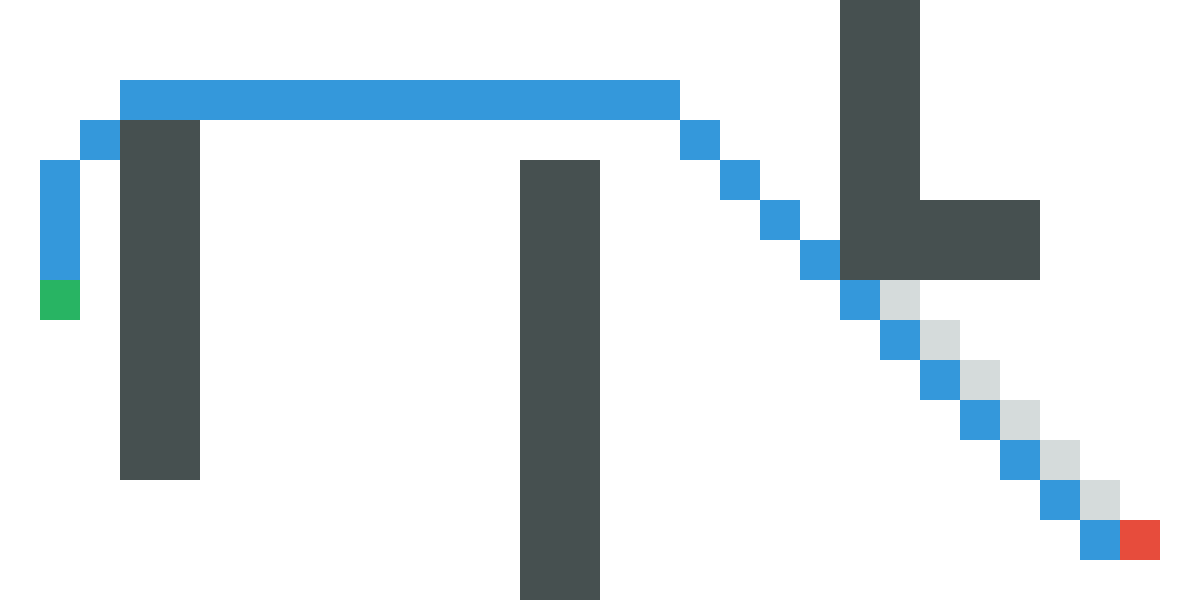

{'time': 0.0006060600280761719,
 'found': True,
 'length': 35.38477631085024,
 'created': 37}

In [4]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

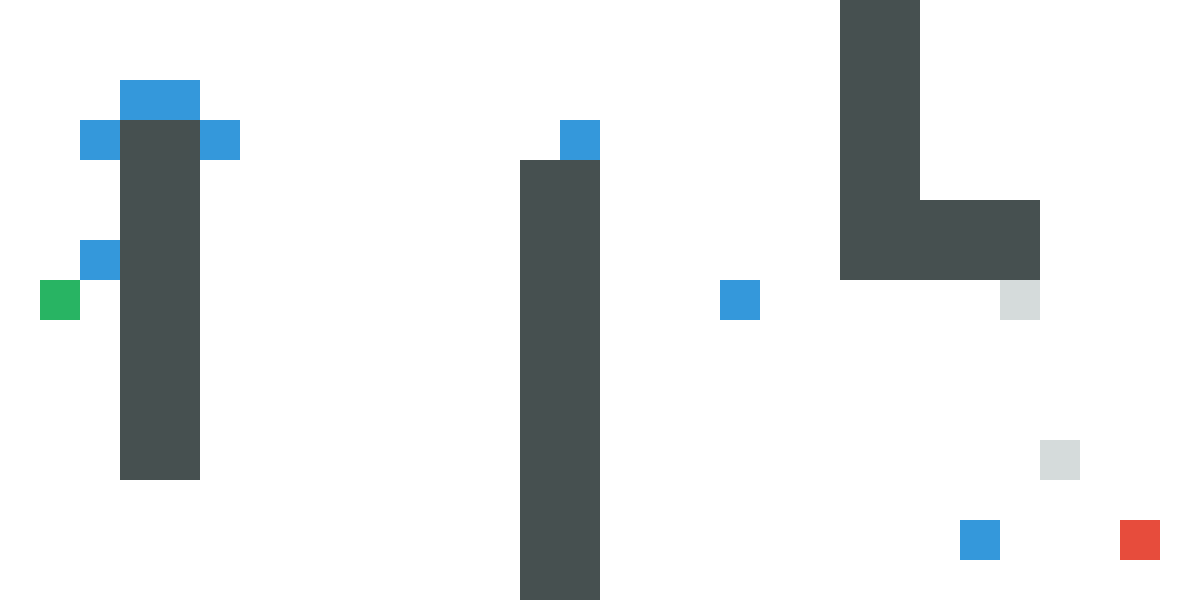

{'time': 0.001917123794555664,
 'found': True,
 'length': 35.384776310850235,
 'created': 12}

In [5]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

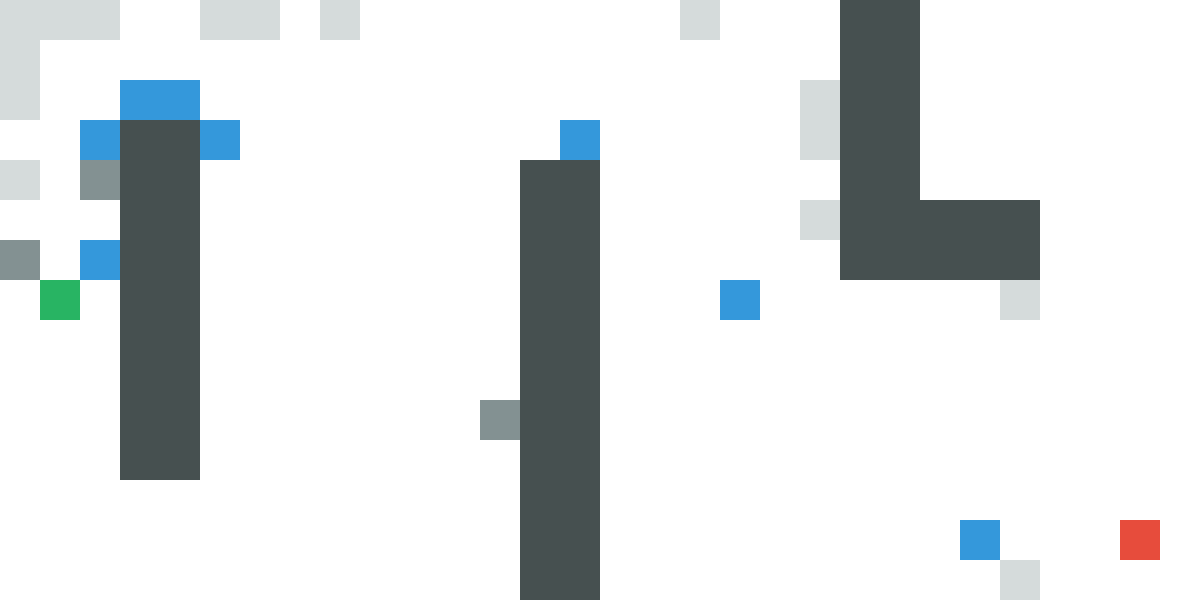

{'time': 0.0004069805145263672,
 'found': True,
 'length': 35.384776310850235,
 'created': 28}

In [5]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

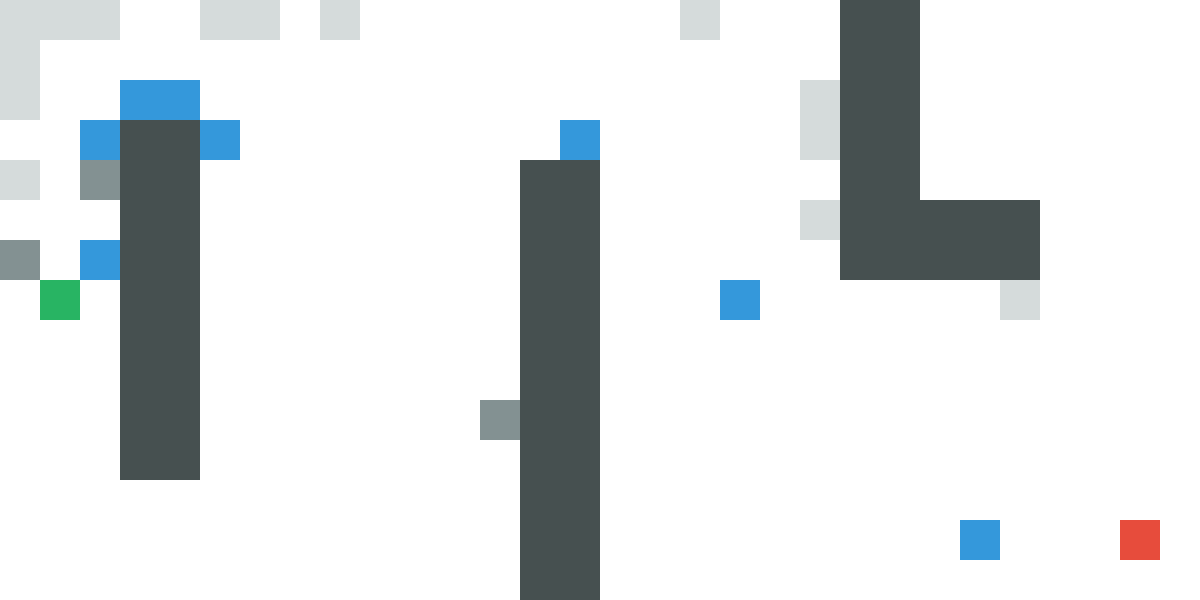

{'time': 0.00033283233642578125,
 'found': True,
 'length': 35.384776310850235,
 'created': 27}

In [5]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

### NoPruning

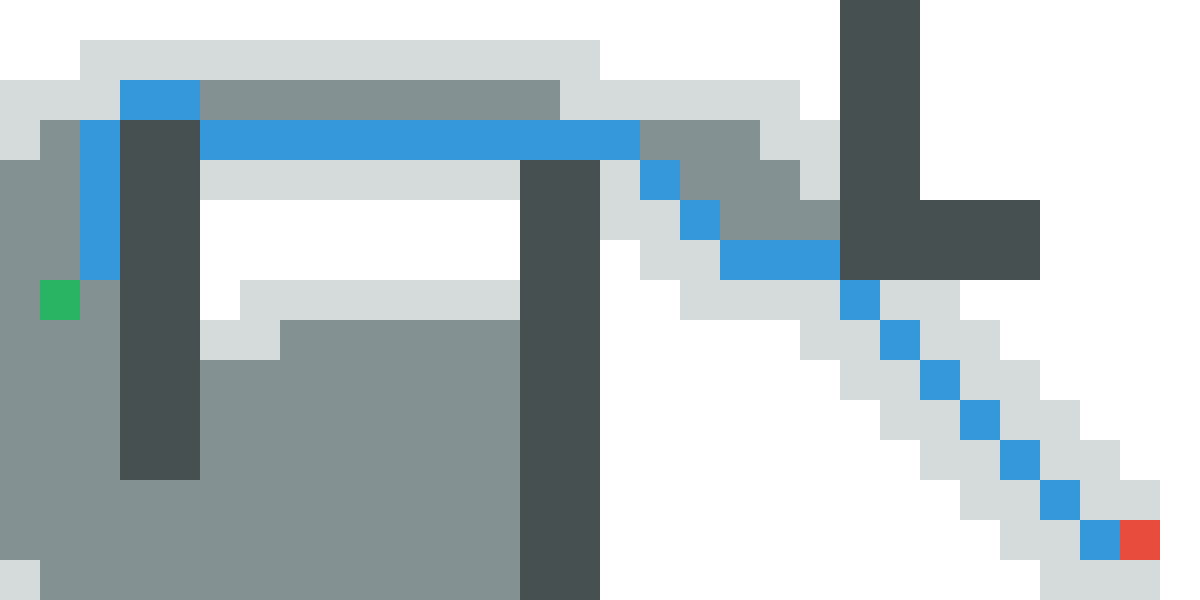

{'time': 0.009956836700439453,
 'found': True,
 'length': 35.384776310850235,
 'created': 218}

In [6]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

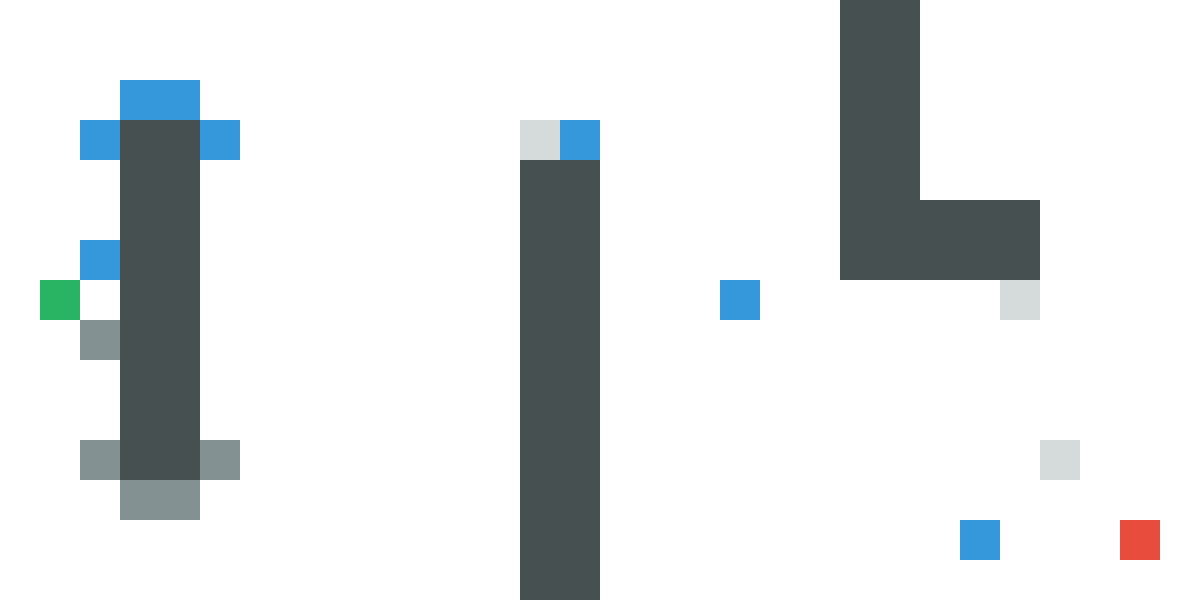

{'time': 0.006842136383056641,
 'found': True,
 'length': 35.384776310850235,
 'created': 18}

In [7]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

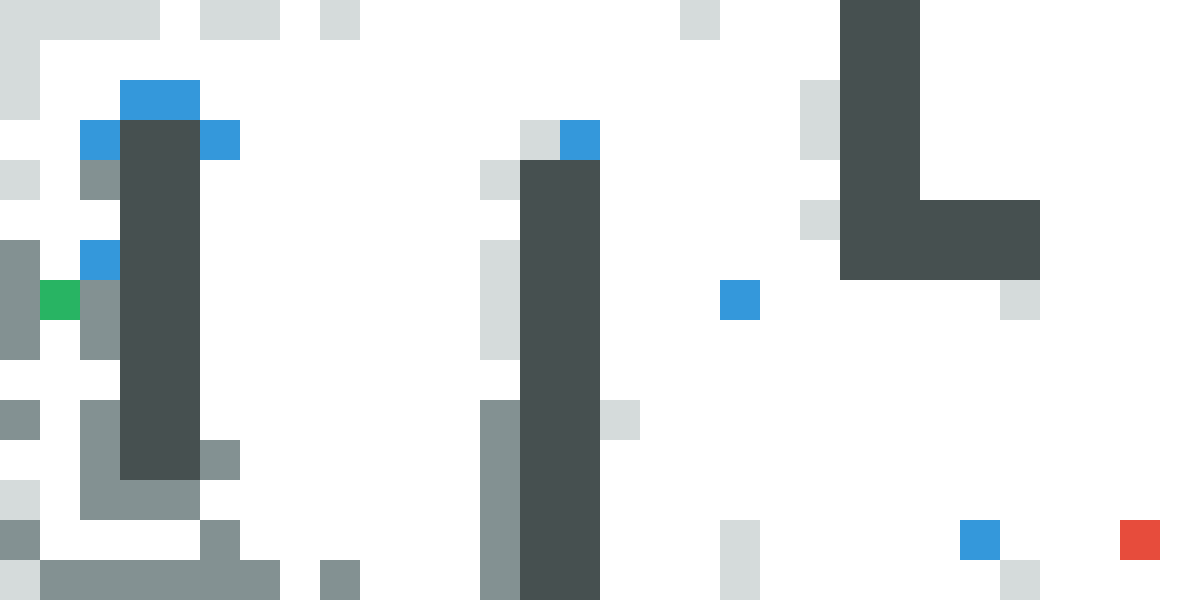

{'time': 0.0007021427154541016,
 'found': True,
 'length': 35.384776310850235,
 'created': 63}

In [8]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

In [9]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # . # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 6
jGoal = 24

In [10]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

### BBox Pruning

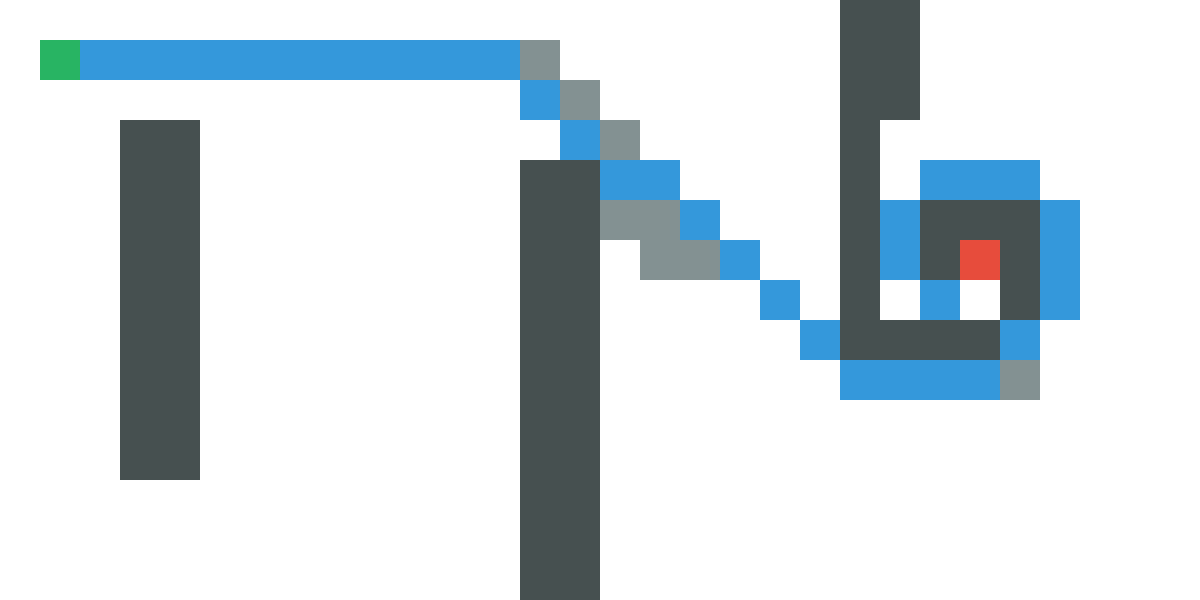

{'time': 0.000965118408203125,
 'found': True,
 'length': 39.79898987322333,
 'created': 43}

In [11]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

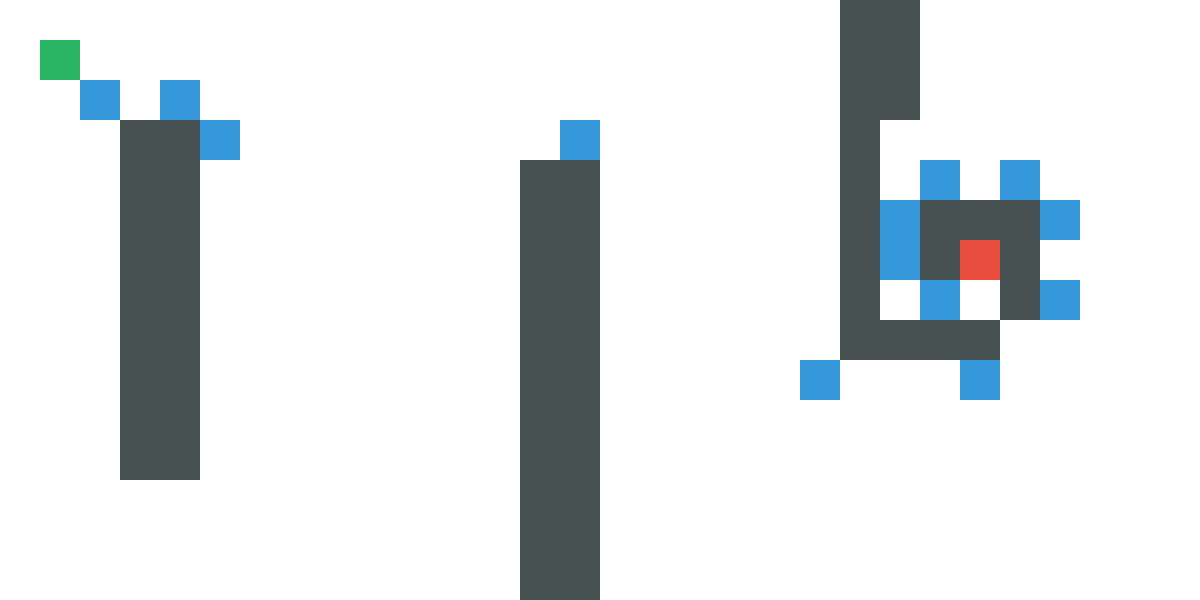

{'time': 0.0024111270904541016,
 'found': True,
 'length': 39.79898987322332,
 'created': 15}

In [12]:
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

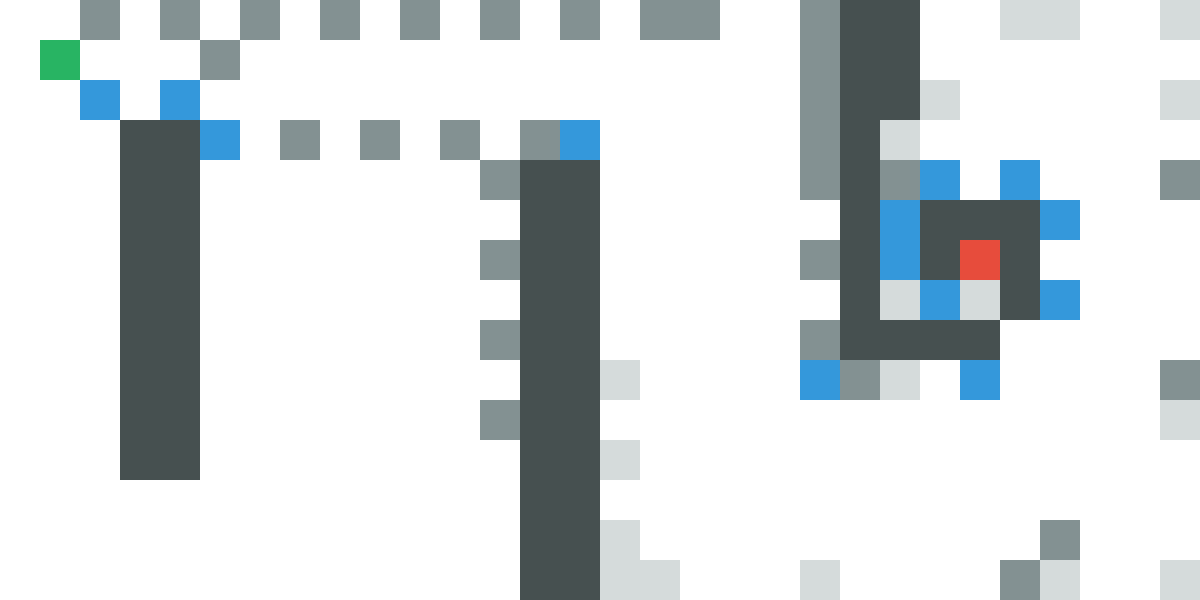

{'time': 0.0010731220245361328,
 'found': True,
 'length': 39.79898987322332,
 'created': 64}

In [13]:
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)